In [1]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder 
from sklearn.impute import SimpleImputer, KNNImputer

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_row', 147)
pd.set_option('display.max_column', 147)

In [5]:
df = pd.read_csv("russia_losses_equipment.csv")
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
0,2022-02-25,2,10,7,80,516,49,4,100,60,0,2,0,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130,60,2,2,0,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130,60,2,2,0,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291,60,3,2,5,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305,60,3,2,7,NaN,NaN


In [6]:
df.shape

(50, 15)

In [7]:
df.columns

Index(['date', 'day', 'aircraft', 'helicopter', 'tank', 'APC',
       'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone',
       'naval ship', 'anti-aircraft warfare', 'special equipment',
       'mobile SRBM system'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   50 non-null     object 
 1   day                    50 non-null     int64  
 2   aircraft               50 non-null     int64  
 3   helicopter             50 non-null     int64  
 4   tank                   50 non-null     int64  
 5   APC                    50 non-null     int64  
 6   field artillery        50 non-null     int64  
 7   MRL                    50 non-null     int64  
 8   military auto          50 non-null     int64  
 9   fuel tank              50 non-null     int64  
 10  drone                  50 non-null     int64  
 11  naval ship             50 non-null     int64  
 12  anti-aircraft warfare  50 non-null     int64  
 13  special equipment      31 non-null     float64
 14  mobile SRBM system     21 non-null     float64
dtypes: float

In [9]:
df.dtypes.value_counts()

int64      12
float64     2
object      1
dtype: int64

In [10]:
numerical_features = make_column_selector(dtype_include = np.number)
categorical_features = make_column_selector(dtype_exclude = np.number)

In [11]:
categorical_pipeline = make_pipeline(SimpleImputer( missing_values=None , strategy='most_frequent'),
                                     SimpleImputer(missing_values=np.nan , 
                                                            strategy='most_frequent'),OneHotEncoder()) 

In [12]:
make_column_transformer((categorical_pipeline, categorical_features))

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('simpleimputer-1',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('simpleimputer-2',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x0000022A6ED472E0>)])

In [13]:
numerical_pipeline = make_pipeline( SimpleImputer(strategy='mean'), StandardScaler())

In [14]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features) , 
                                       (categorical_pipeline, categorical_features))

In [15]:
X_scaled = preprocessor.fit_transform(df)
X_scaled

<50x64 sparse matrix of type '<class 'numpy.float64'>'
	with 721 stored elements in Compressed Sparse Row format>

In [16]:
X_scaled.shape

(50, 64)

In [40]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

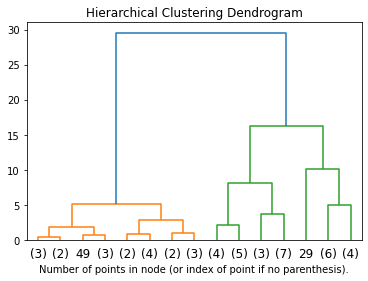

In [41]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X_scaled)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


## silhouette_curve

For n_clusters = 5 The average silhouette_score is : 0.600117584561524
For n_clusters = 6 The average silhouette_score is : 0.5215182257855013
For n_clusters = 7 The average silhouette_score is : 0.5466248271154822
For n_clusters = 8 The average silhouette_score is : 0.550823810477782
For n_clusters = 9 The average silhouette_score is : 0.5229063946572208
For n_clusters = 10 The average silhouette_score is : 0.5167221145871462
For n_clusters = 11 The average silhouette_score is : 0.5315466563831523
For n_clusters = 12 The average silhouette_score is : 0.527415454996018
For n_clusters = 13 The average silhouette_score is : 0.5059512560231899
For n_clusters = 14 The average silhouette_score is : 0.4738908691601786
For n_clusters = 15 The average silhouette_score is : 0.48981158604173625
For n_clusters = 16 The average silhouette_score is : 0.5083144066790181
For n_clusters = 17 The average silhouette_score is : 0.5031654282143065
For n_clusters = 18 The average silhouette_score is : 0.48

<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 25 The average silhouette_score is : 0.42913782784783855


<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 26 The average silhouette_score is : 0.4157248527826236


<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 27 The average silhouette_score is : 0.39148092028376325


<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 28 The average silhouette_score is : 0.3832267407309218


<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 29 The average silhouette_score is : 0.3484905555240408


<ipython-input-47-b3c4c247e66e>:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1, ax2) = plt.subplots(1, 2)


For n_clusters = 30 The average silhouette_score is : 0.34175372714769997


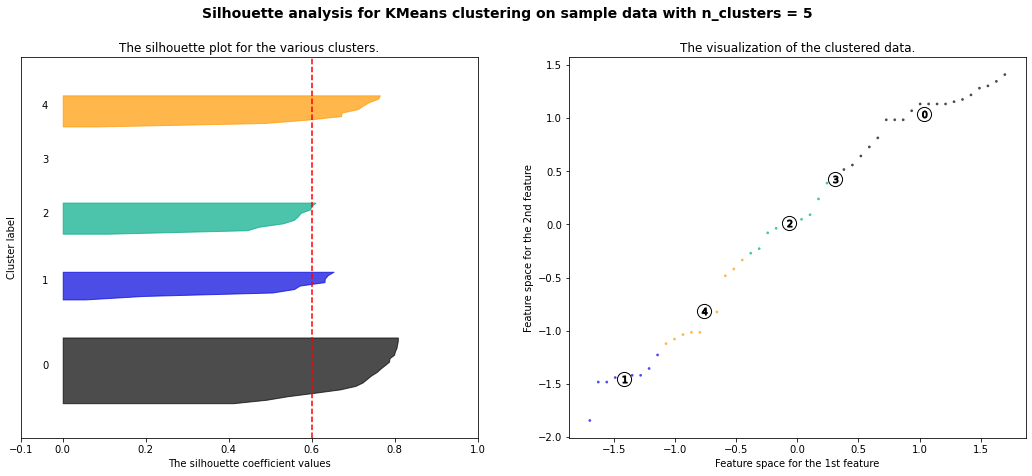

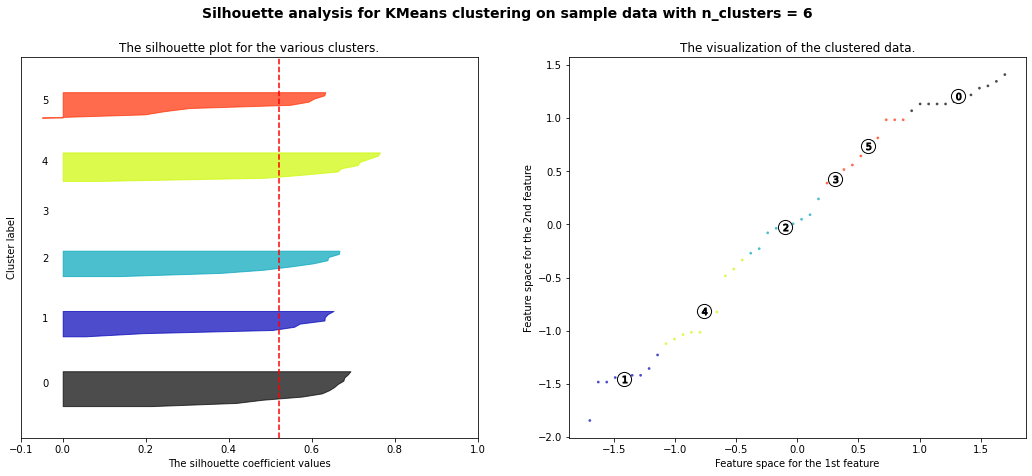

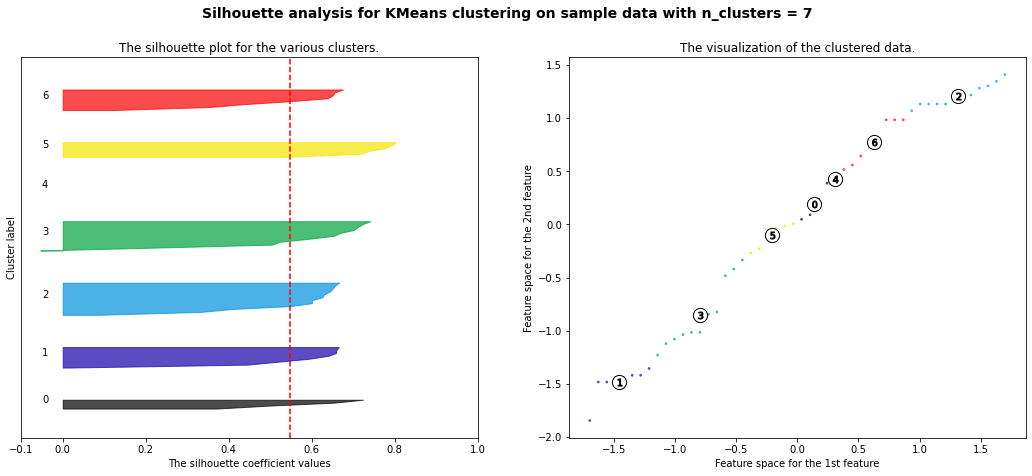

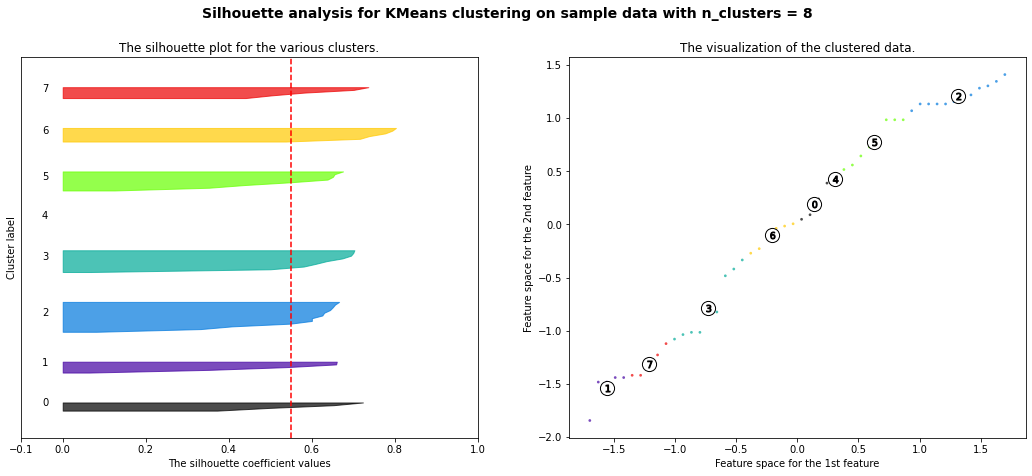

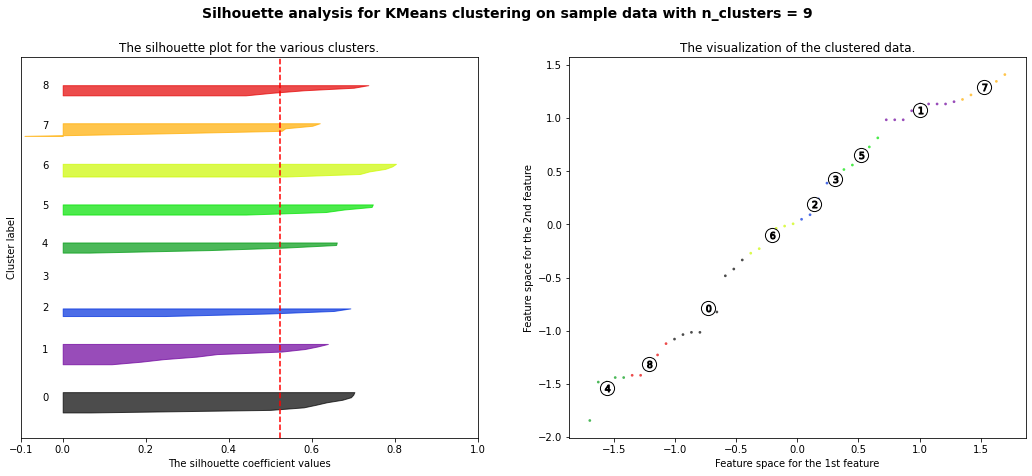

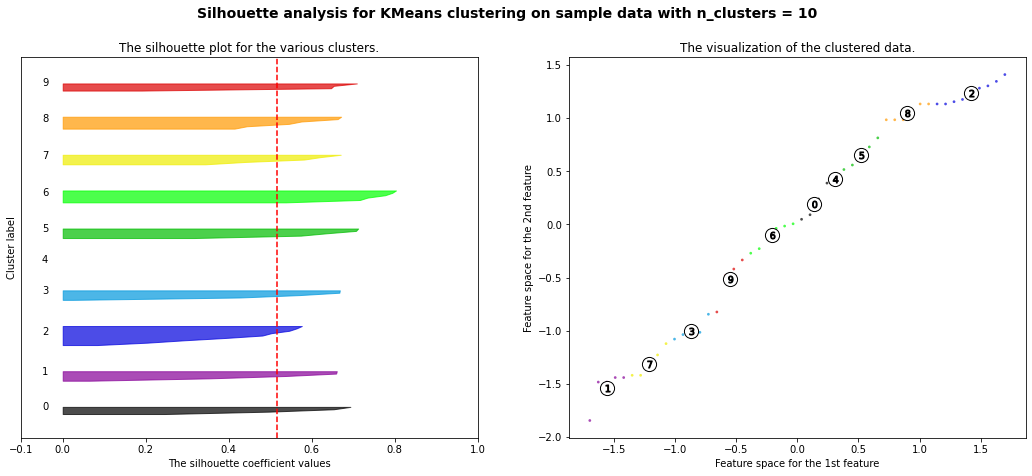

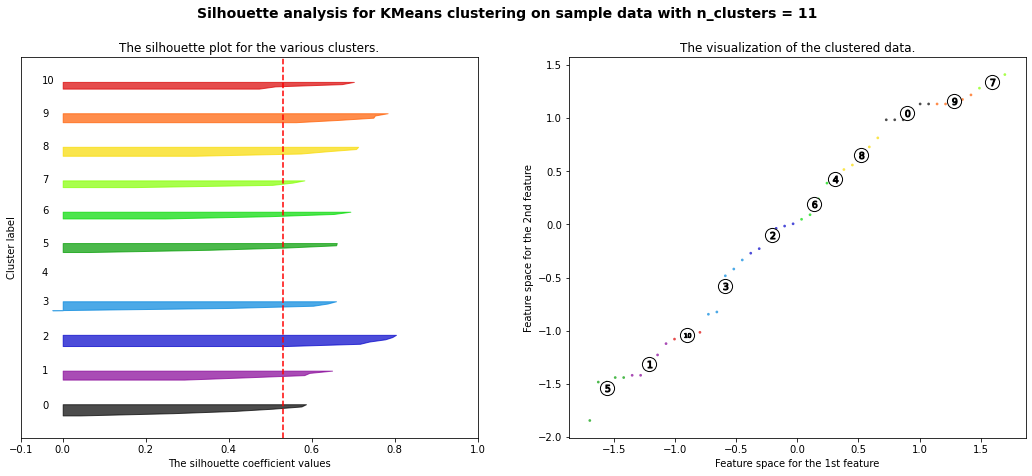

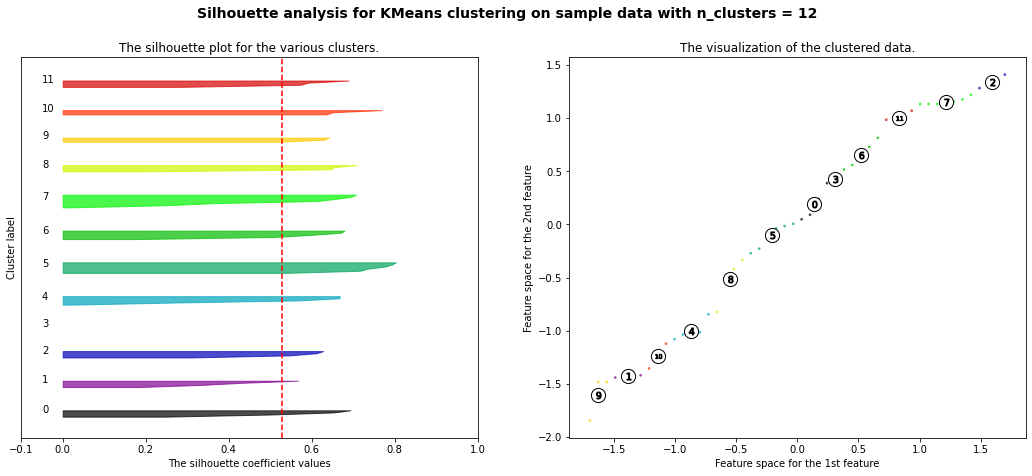

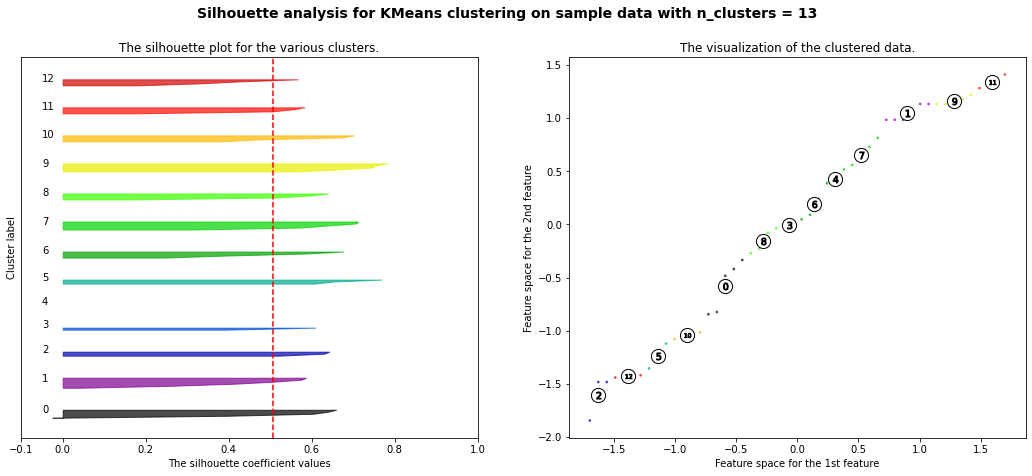

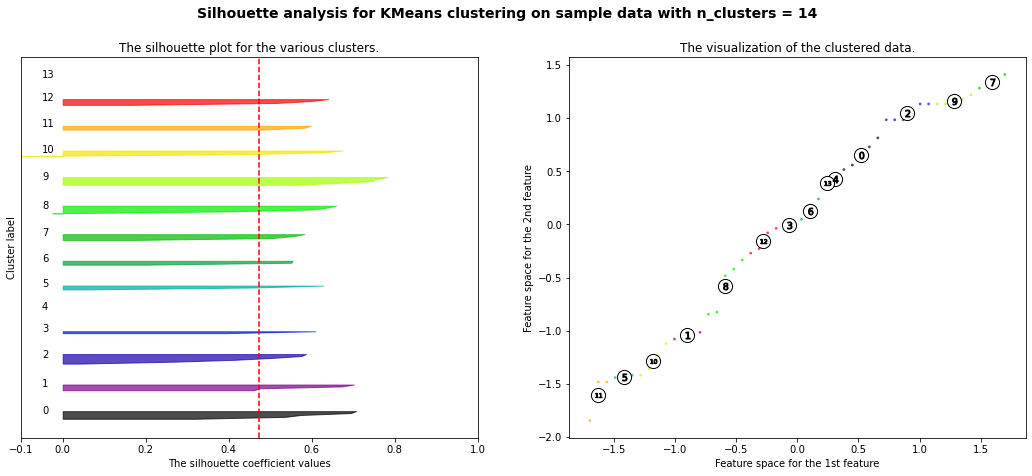

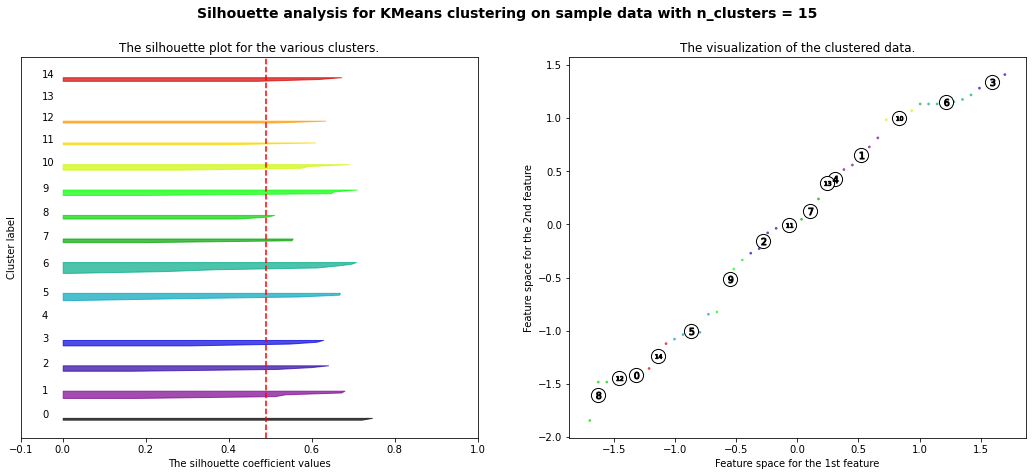

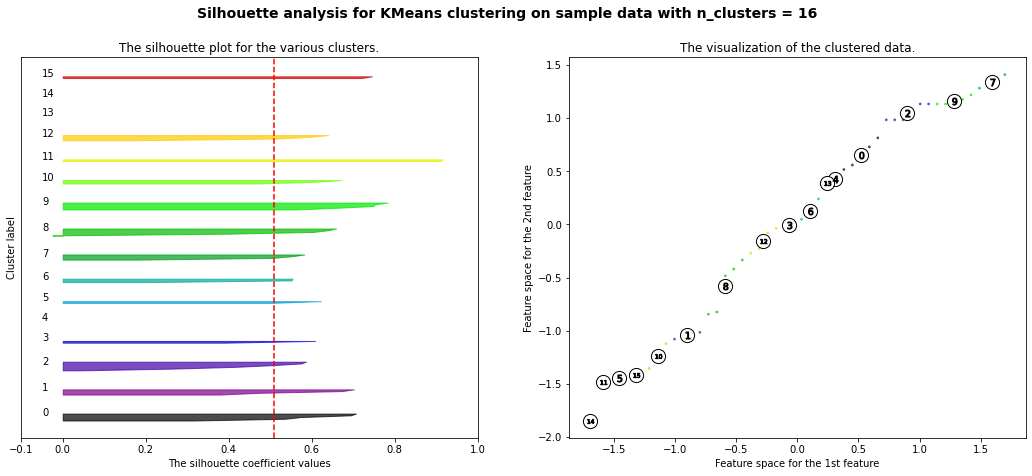

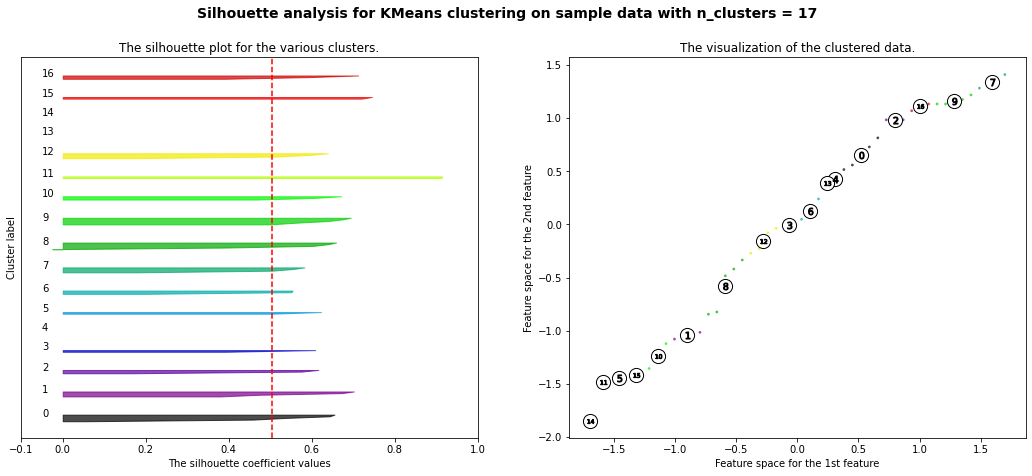

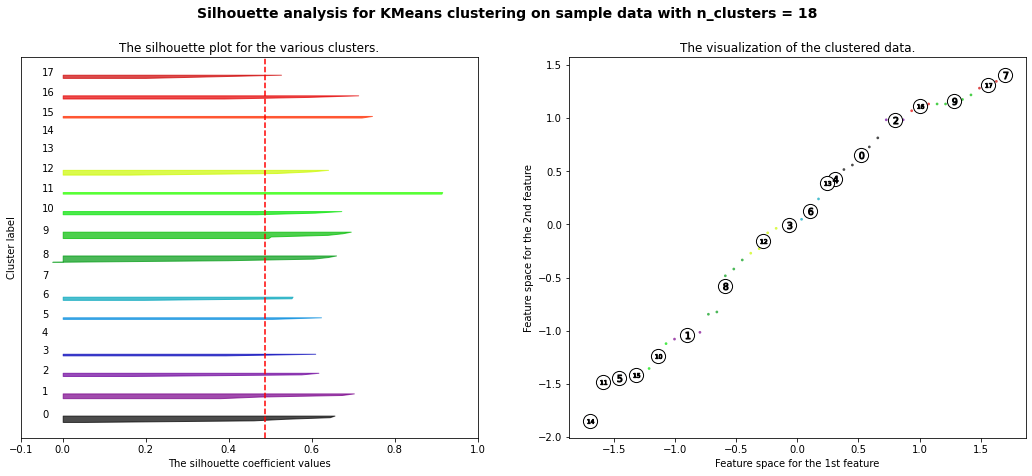

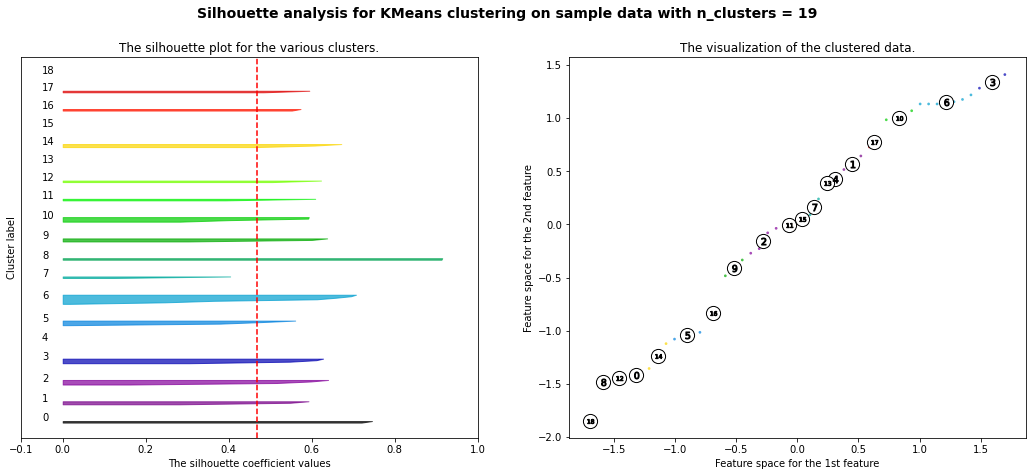

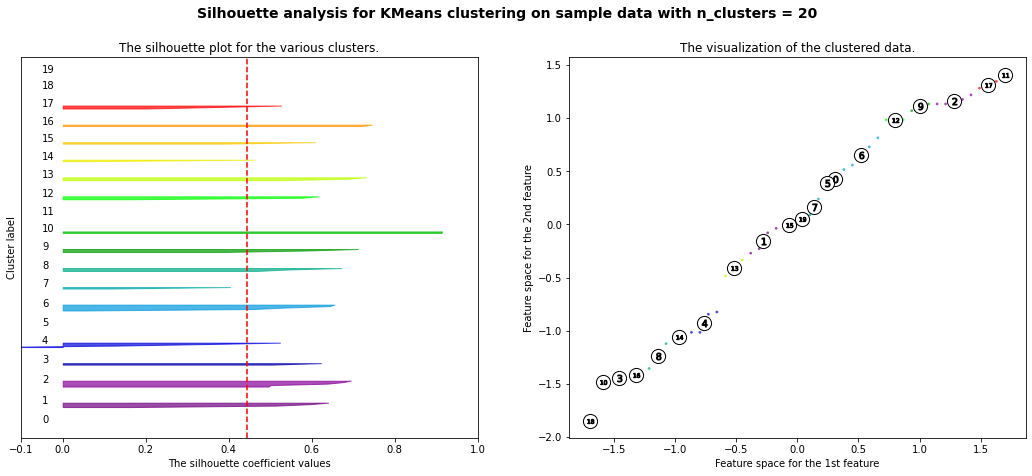

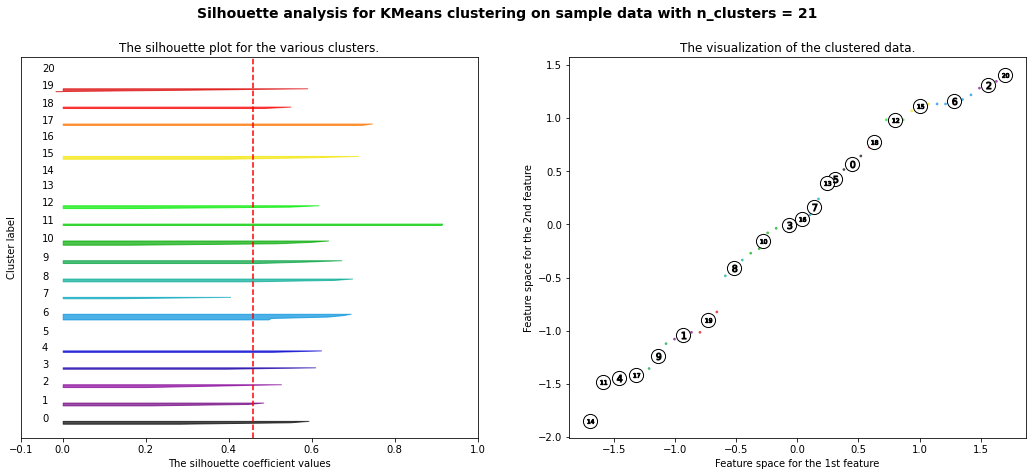

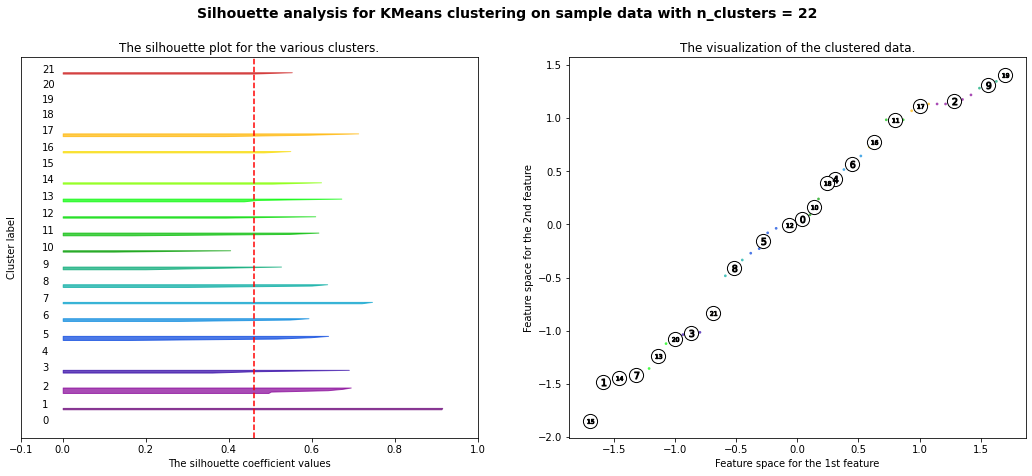

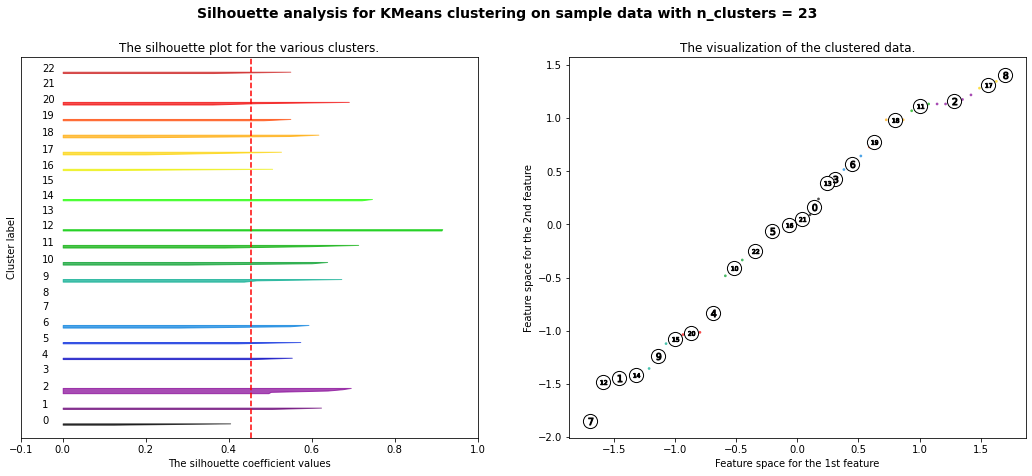

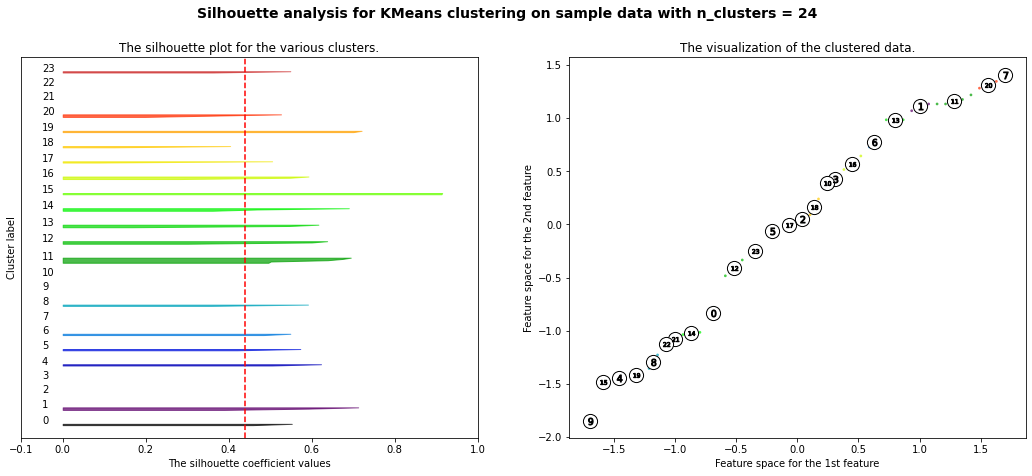

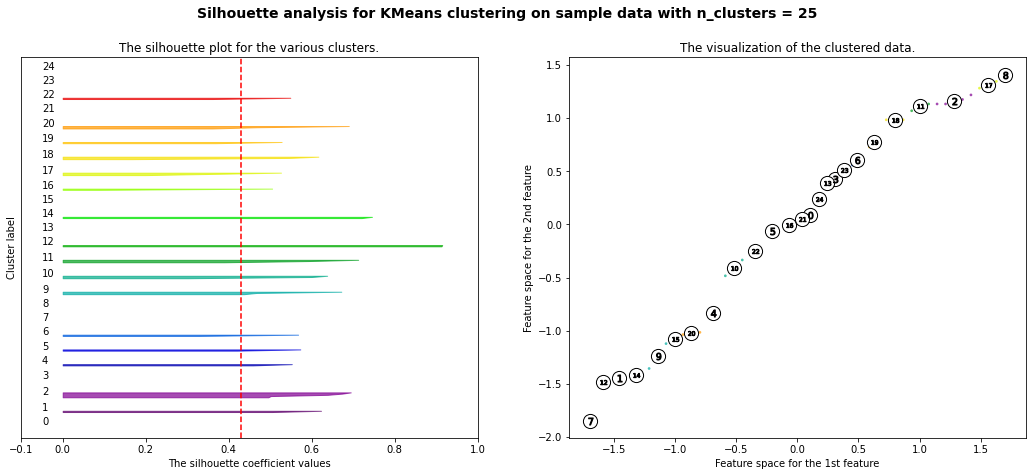

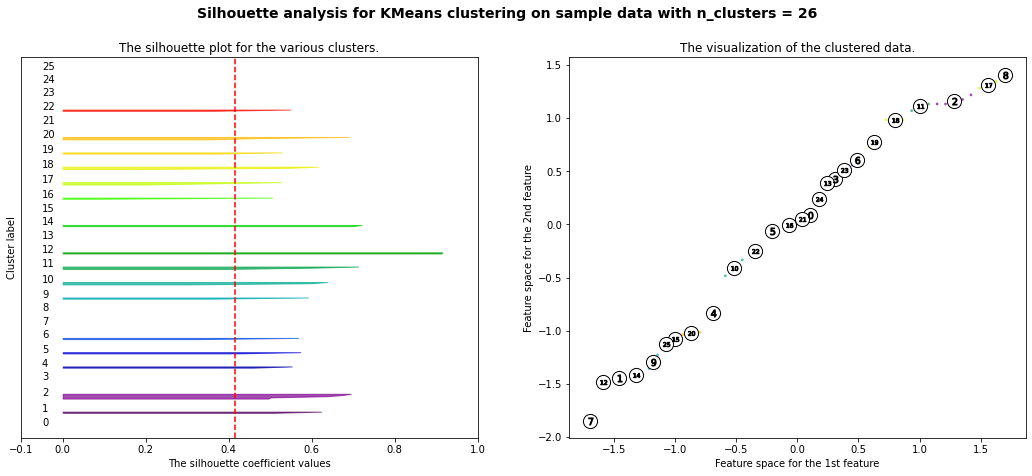

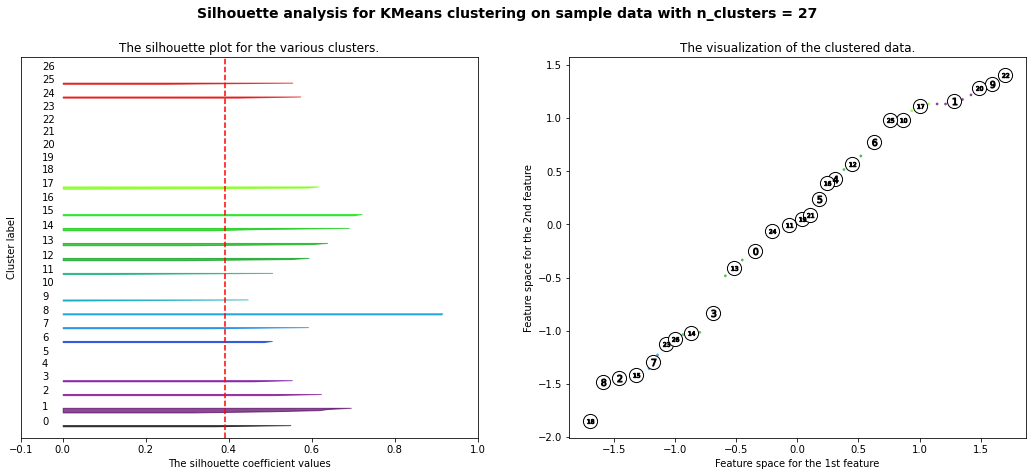

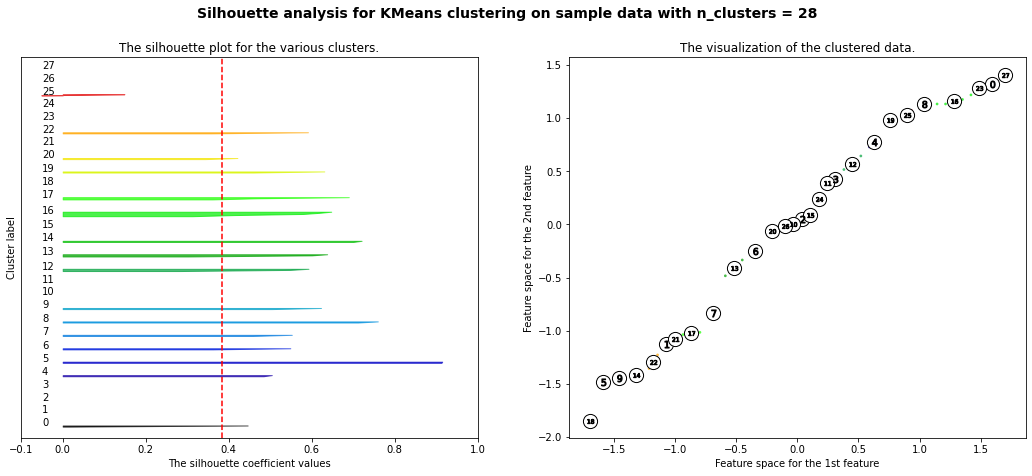

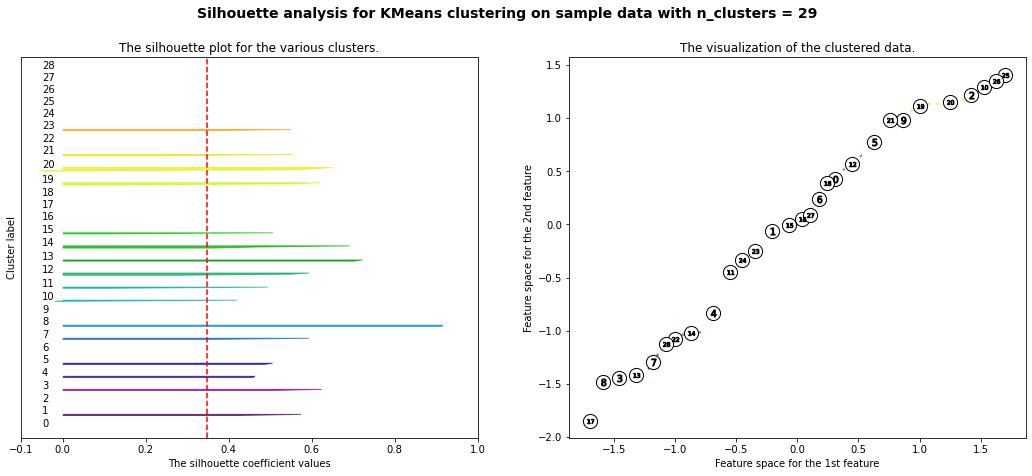

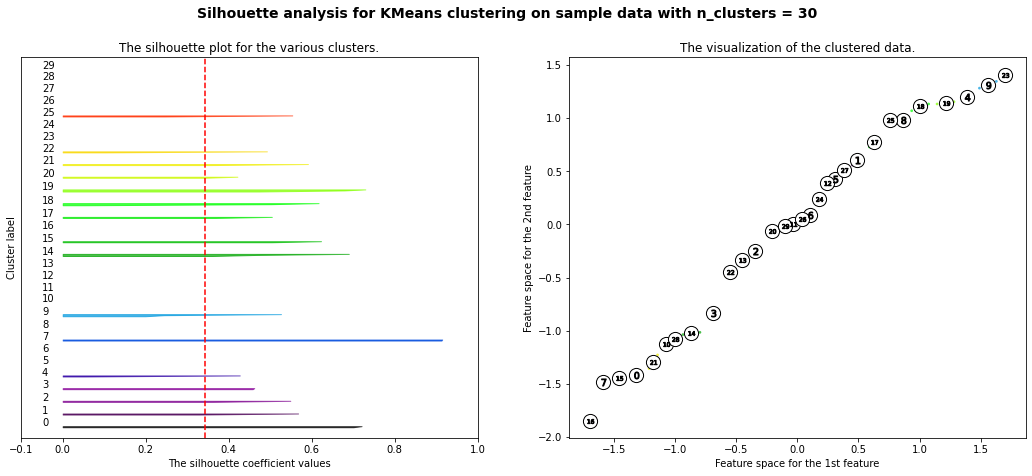

In [47]:
# Fuktion aus Sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


range_n_clusters = range(5, 31)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_scaled)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_scaled, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X_scaled[:, 0], X_scaled[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## TSNE

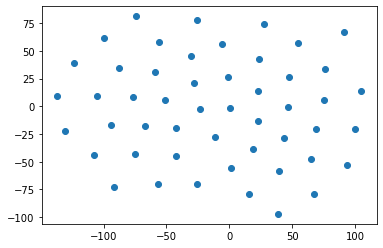

In [48]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2 , perplexity = 45).fit_transform(X_scaled)
plt.scatter(X_embedded[:,0], X_embedded[:,1] )

## Elbow Method

Text(0.5, 0, 'nomber of clusters')

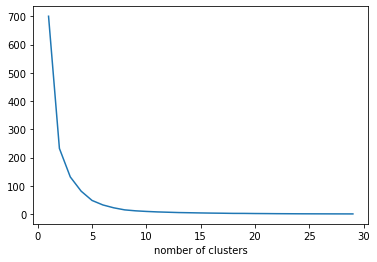

In [55]:
inertia = []
K_range = range(1, 30)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nomber of clusters')


## K-Means-Clustering

In [51]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 3)
model.fit(X_scaled)

KMeans(n_clusters=3)

-131.48569175166972

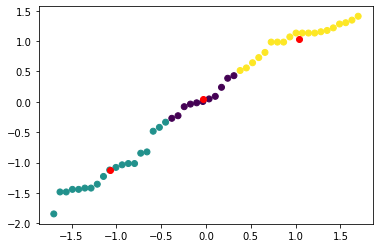

In [52]:
model = KMeans(n_clusters=3)
model.fit(X_scaled)
model.predict(X_scaled)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=model.predict(X_scaled))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X_scaled)